In [12]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

# 1). Preprocessing: Detect face and eyes

In [13]:
img = cv2.imread('./test/modi.jpg')
img.shape

(640, 960, 3)

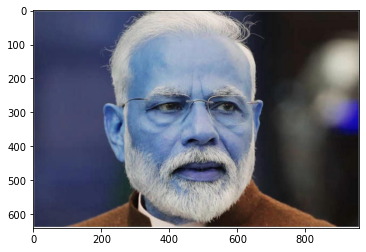

In [14]:
plt.imshow(img)

In [15]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(640, 960)

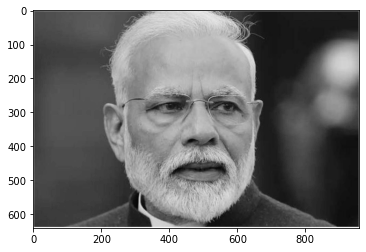

In [16]:
plt.imshow(gray,cmap='gray')

In [17]:
face_cascade = cv2.CascadeClassifier('./opencv-master/data/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv-master/data/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[227,  66, 527, 527]], dtype=int32)

In [18]:
(x,y,w,h) = faces[0]
x,y,w,h

(227, 66, 527, 527)

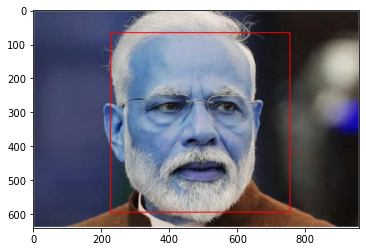

In [19]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

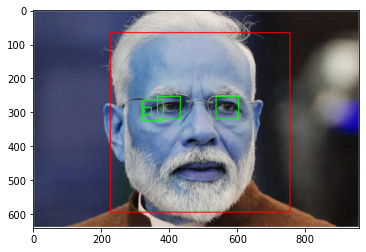

In [20]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

# (2) Preprocessing: Crop the facial region of the image

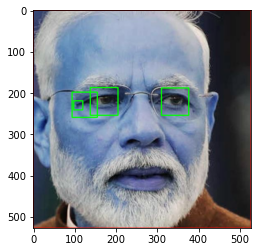

In [21]:
plt.imshow(roi_color, cmap='gray')

In [22]:






cropped_img = np.array(roi_color)
cropped_img.shape

(527, 527, 3)

# (3) Preprocessing:

In [23]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

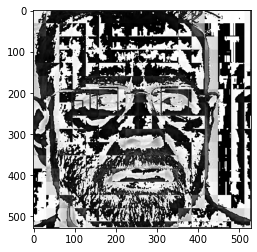

In [24]:
im_har = w2d(cropped_img,'db1',5)
plt.imshow(im_har, cmap='gray')

In [25]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

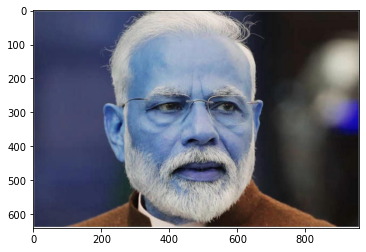

In [26]:
original_image = cv2.imread('./test/modi.jpg')
plt.imshow(original_image)

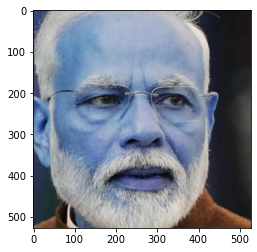

In [27]:
cropped_image = get_cropped_image_if_2_eyes('./test/modi.jpg')
plt.imshow(cropped_image)

In [28]:
path_to_data = "./datset/"
path_to_cr_data = "./datset/cropped/"

In [40]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [41]:
img_dirs

['./datset/atal bihari vajpayee - Google Search',
 './datset/charan singh - Google Search',
 './datset/gulzarilal nanda - Bing images',
 './datset/hd deve gowda - Google Search',
 './datset/inder kumar gujral - Google Search',
 './datset/indira gandhi - Google Search',
 './datset/jawaharlal nehru - Google Search',
 './datset/lal bahadur shastri - Google Search',
 './datset/morarji desai - Google Search',
 './datset/narendra modi - Google Search',
 './datset/vishwanath pratap singh - Google Search']

In [42]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [43]:
cropped_image_dirs = []
pm_names_dict = {}
for img_dir in img_dirs:
    count = 1
    pm_name = img_dir.split('/')[-1]
    pm_names_dict[pm_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + pm_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = pm_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            pm_names_dict[pm_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./datset/cropped/atal bihari vajpayee - Google Search
Generating cropped images in folder:  ./datset/cropped/charan singh - Google Search
Generating cropped images in folder:  ./datset/cropped/gulzarilal nanda - Bing images
Generating cropped images in folder:  ./datset/cropped/hd deve gowda - Google Search
Generating cropped images in folder:  ./datset/cropped/inder kumar gujral - Google Search
Generating cropped images in folder:  ./datset/cropped/indira gandhi - Google Search
Generating cropped images in folder:  ./datset/cropped/jawaharlal nehru - Google Search
Generating cropped images in folder:  ./datset/cropped/lal bahadur shastri - Google Search
Generating cropped images in folder:  ./datset/cropped/morarji desai - Google Search
Generating cropped images in folder:  ./datset/cropped/narendra modi - Google Search
Generating cropped images in folder:  ./datset/cropped/vishwanath pratap singh - Google Search


In [44]:
pm_names_dict = {}
for img_dir in cropped_image_dirs:
    pm_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    pm_names_dict[pm_name] = file_list
pm_names_dict

{'atal bihari vajpayee - Google Search': ['./datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search1.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search2.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search3.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search4.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search5.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search6.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search7.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search8.png',
  './datset/cropped/atal bihari vajpayee - Google Search\\atal bihari vajpayee - Google Search9.png'],
 'charan singh - Google Search': ['./dats

In [45]:
class_dict = {}
count = 0
for pm_name in pm_names_dict.keys():
    class_dict[pm_name] = count
    count = count + 1
class_dict

{'atal bihari vajpayee - Google Search': 0,
 'charan singh - Google Search': 1,
 'gulzarilal nanda - Bing images': 2,
 'hd deve gowda - Google Search': 3,
 'inder kumar gujral - Google Search': 4,
 'indira gandhi - Google Search': 5,
 'jawaharlal nehru - Google Search': 6,
 'lal bahadur shastri - Google Search': 7,
 'morarji desai - Google Search': 8,
 'narendra modi - Google Search': 9,
 'vishwanath pratap singh - Google Search': 10}

# model training.

In [46]:
X, y = [], []
for pm_name, training_files in pm_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[pm_name])

In [47]:
len(X[0])#here we have converted the images to 32*32

4096

In [48]:
X[0]

array([[ 24],
       [  8],
       [  0],
       ...,
       [254],
       [  2],
       [ 45]], dtype=uint8)

In [49]:
y[0]

0

In [50]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(79, 4096)

In [51]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.5

In [53]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       1.00      1.00      1.00         1
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         1
           5       0.33      1.00      0.50         4
           6       0.67      1.00      0.80         2
           7       1.00      0.25      0.40         4
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         1
          10       0.00      0.00      0.00         1

    accuracy                           0.50        20
   macro avg       0.37      0.39      0.34        20
weighted avg       0.48      0.50      0.41        20



C:\Users\NEW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [54]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [55]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    },
    'linear_regression':
    {
        'model':LinearRegression(),
        'params':{
            
        }
    }
}

In [56]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

C:\Users\NEW\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"
C:\Users\NEW\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


,model,best_score,best_params
0,svm,0.609091,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.440909,{'randomforestclassifier__n_estimators': 5}
2,logistic_regression,0.522727,{'logisticregression__C': 1}
3,linear_regression,0.388684,{}


In [57]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=5))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))]),
 'linear_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('linearregression', LinearRegression())])}

In [58]:
best_estimators['svm'].score(X_test,y_test)

0.45

In [59]:
best_estimators['random_forest'].score(X_test,y_test)

0.25

In [60]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.5

In [61]:
best_clf = best_estimators['logistic_regression']

Text(69.0, 0.5, 'Truth')

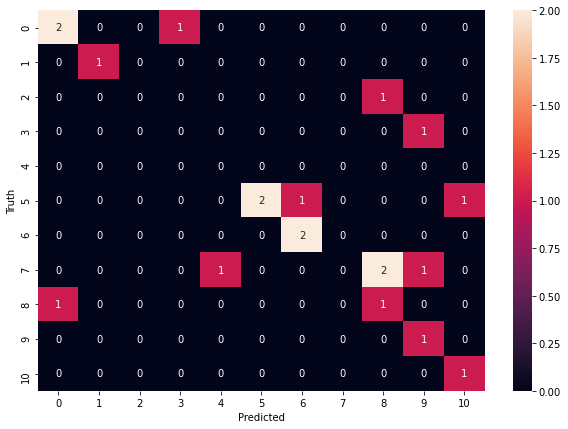

In [62]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

model.save("prime_minister.h5")

In [63]:
class_dict

{'atal bihari vajpayee - Google Search': 0,
 'charan singh - Google Search': 1,
 'gulzarilal nanda - Bing images': 2,
 'hd deve gowda - Google Search': 3,
 'inder kumar gujral - Google Search': 4,
 'indira gandhi - Google Search': 5,
 'jawaharlal nehru - Google Search': 6,
 'lal bahadur shastri - Google Search': 7,
 'morarji desai - Google Search': 8,
 'narendra modi - Google Search': 9,
 'vishwanath pratap singh - Google Search': 10}